In [50]:
import cv2
import matplotlib.pyplot as plt
import os

### Custom Functions

#### Display image using matplotlib in Jupyter Notebook

In [51]:
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

#### Rename Folder

In [52]:
def rename_file(image_path):
    new_name = input("Register Number: ")
    if len(new_name) != 12 or not new_name.isdigit():
        print("Invalid name. Please enter a 12-digit number.")
        rename_file(image_path)
        return

    target_name = new_name + '.png'
    try:
        os.rename(image_path, target_name)
        print(f"File renamed to {target_name}")
    except FileExistsError:
        index = 1
        while True:
            target_name = f"{new_name} ({index}).png"
            try:
                os.rename(image_path, target_name)
                print(f"File renamed to {target_name}")
                break
            except FileExistsError:
                index += 1
        
    return target_name

#### Move the file to the specified folder.

In [53]:
def move_to_folder(image_path, folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    new_path = os.path.join(folder_name, os.path.basename(image_path))
    os.rename(image_path, new_path)
    print(f"File moved to {folder_name}")

#### Main Function

In [59]:
def main(image_path):
    image = cv2.imread(image_path)
    display_image(image)

    # Wish to rotate
    choice = input("Rotate Image? (y/n): ")
    if choice.lower() == 'y':
        image = cv2.rotate(image, cv2.ROTATE_180)
        display_image(image)
        cv2.imwrite(image_path, image)
        print("Image Rotated")

    # Rename File (Compulsory)
    new_name = rename_file(image_path)

    # Move to Respective Folder
    choice = input("Move to Rotate Folder? \n 0 for Root Folder \n (1 for Annotated, 2 for Wrong Predictions): ")

    # Move to Root Folder
    if choice == '0':
        return
    # Move to Annotated Folder
    if choice == '1':
        move_to_folder(new_name, './annotated')
    # Move to Wrong Folder
    if choice == '2':
        move_to_folder(new_name, './wrong_predictions')

### Driver Code

In [55]:
root_folder = './images'
for filename in os.listdir(root_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(root_folder, filename)
        main(image_path)
print("All Images Processed. Thank you!")

All Images Processed. Thank you!


### Check Renamed images

In [56]:
def display_image_with_title(image, title):
    """Display image using matplotlib in Jupyter Notebook."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

In [57]:
root_folder = './'

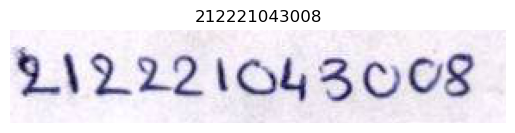

In [58]:
for filename in os.listdir(root_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(root_folder, filename)  # Construct full path to the image
        image = cv2.imread(image_path)
        if image is not None:  # Check if image is successfully read
            display_image_with_title(image,filename[:-4])
            """
            filename[:4] - College Code
            filename[4:6] - Batch
            filename[6:8] - Dept Code
            filename[8:12] - College Code
            """
        else:
            print(f"Failed to read image: {filename}")